In [78]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [79]:
df=pd.read_pickle("../../results/cluster_0.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
185,1,0,0,0,0,0,0,1,0,0,...,0,1,2,3,6.156041,1.666667,2.5,-34.196691,16.551565,0
197,1,0,0,1,0,0,0,0,0,0,...,1,0,1,2,8.244505,1.000000,2.0,-9.582847,16.215009,0
207,0,0,1,1,0,0,0,0,0,0,...,0,0,2,3,6.798192,1.000000,2.0,-23.549976,16.084715,0
208,0,1,0,0,0,0,0,0,0,1,...,1,0,1,2,7.794999,1.000000,1.0,-9.296161,16.069521,0
214,0,0,1,0,0,0,0,1,0,0,...,0,0,2,2,10.704291,1.333333,0.5,-6.791879,15.917127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49490,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,-0.345552,-0.333333,3.5,-0.820387,-0.360497,0
49491,0,0,1,0,0,0,1,0,0,0,...,1,0,2,1,-0.234184,1.000000,3.0,-1.580706,-0.360497,0
49492,0,1,0,1,0,0,0,0,0,0,...,1,0,2,2,-0.266836,-0.333333,0.0,-0.203972,-0.360958,0
49493,0,1,0,1,0,0,0,0,0,0,...,1,0,2,1,-0.093488,0.666667,0.0,-0.133305,-0.360958,0


In [80]:
df2=pd.read_pickle("../../results/cluster_sinencod_0.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.840,8,0.5,-1268.040,367.35,Critical,0
197,Second Class,Consumer,APAC,Office Supplies,1900.584,6,0.4,-348.516,360.04,High,0
207,Same Day,Home Office,APAC,Furniture,1582.200,6,0.4,-870.300,357.21,Critical,0
208,Second Class,Corporate,US,Office Supplies,1801.632,6,0.2,-337.806,356.88,High,0
214,First Class,Home Office,EU,Furniture,2442.069,7,0.1,-244.251,353.57,High,0
...,...,...,...,...,...,...,...,...,...,...,...
49490,Standard Class,Corporate,Africa,Office Supplies,9.612,2,0.7,-21.168,0.02,Medium,0
49491,First Class,Home Office,EMEA,Office Supplies,34.128,6,0.6,-49.572,0.02,Medium,0
49492,Same Day,Corporate,APAC,Office Supplies,26.940,2,0.0,1.860,0.01,High,0
49493,Same Day,Corporate,APAC,Office Supplies,65.100,5,0.0,4.500,0.01,Medium,0


In [81]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [82]:
df["Sales_robust"]=df2["Sales"]

In [83]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [84]:
params_arbol = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [50, 100, 150],
    'max_leaf_nodes': [30, 40, 50, 60, 70, 100]
}

randomized_search_arbol = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=params_arbol,
    n_iter=100,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

randomized_search_arbol.fit(x_train, y_train)
model_DecisionTreeRegressor=randomized_search_arbol.best_estimator_

In [85]:
y_train_pred=model_DecisionTreeRegressor.predict(x_train)
y_test_pred=model_DecisionTreeRegressor.predict(x_test)

In [86]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.821600,49.716100,10204.575100,101.017700
Test,0.790300,52.557900,12155.719200,110.253000
Diferencia Train-Test,0.031300,-2.841800,-1951.144100,-9.235300
Porcentaje diferencia (%),0.970900,-1.389300,-4.363000,-2.185700
Rango valores,2951.155000,2951.155000,2951.155000,2951.155000
Ratio Rango (%),0.027310,1.732779,378.839714,3.579458
Influencia dif rango (%),0.001100,0.096300,66.114600,0.312900
Media,171.514200,171.514200,171.514200,171.514200
Ratio Media(%),0.469903,29.815024,6518.496515,61.589857
Influencia dif media (%),0.018200,1.656900,1137.599200,5.384600


El modelo tiene un buen rendimiento, explicando entre el 79% y el 82% de la varianza, con errores bajos (MAE ~50) y diferencias mínimas entre entrenamiento y prueba (<5%). Esto indica que generaliza bien y no presenta sobreajuste ni subajuste. Es confiable para predicciones, pero podría mejorarse en casos extremos.

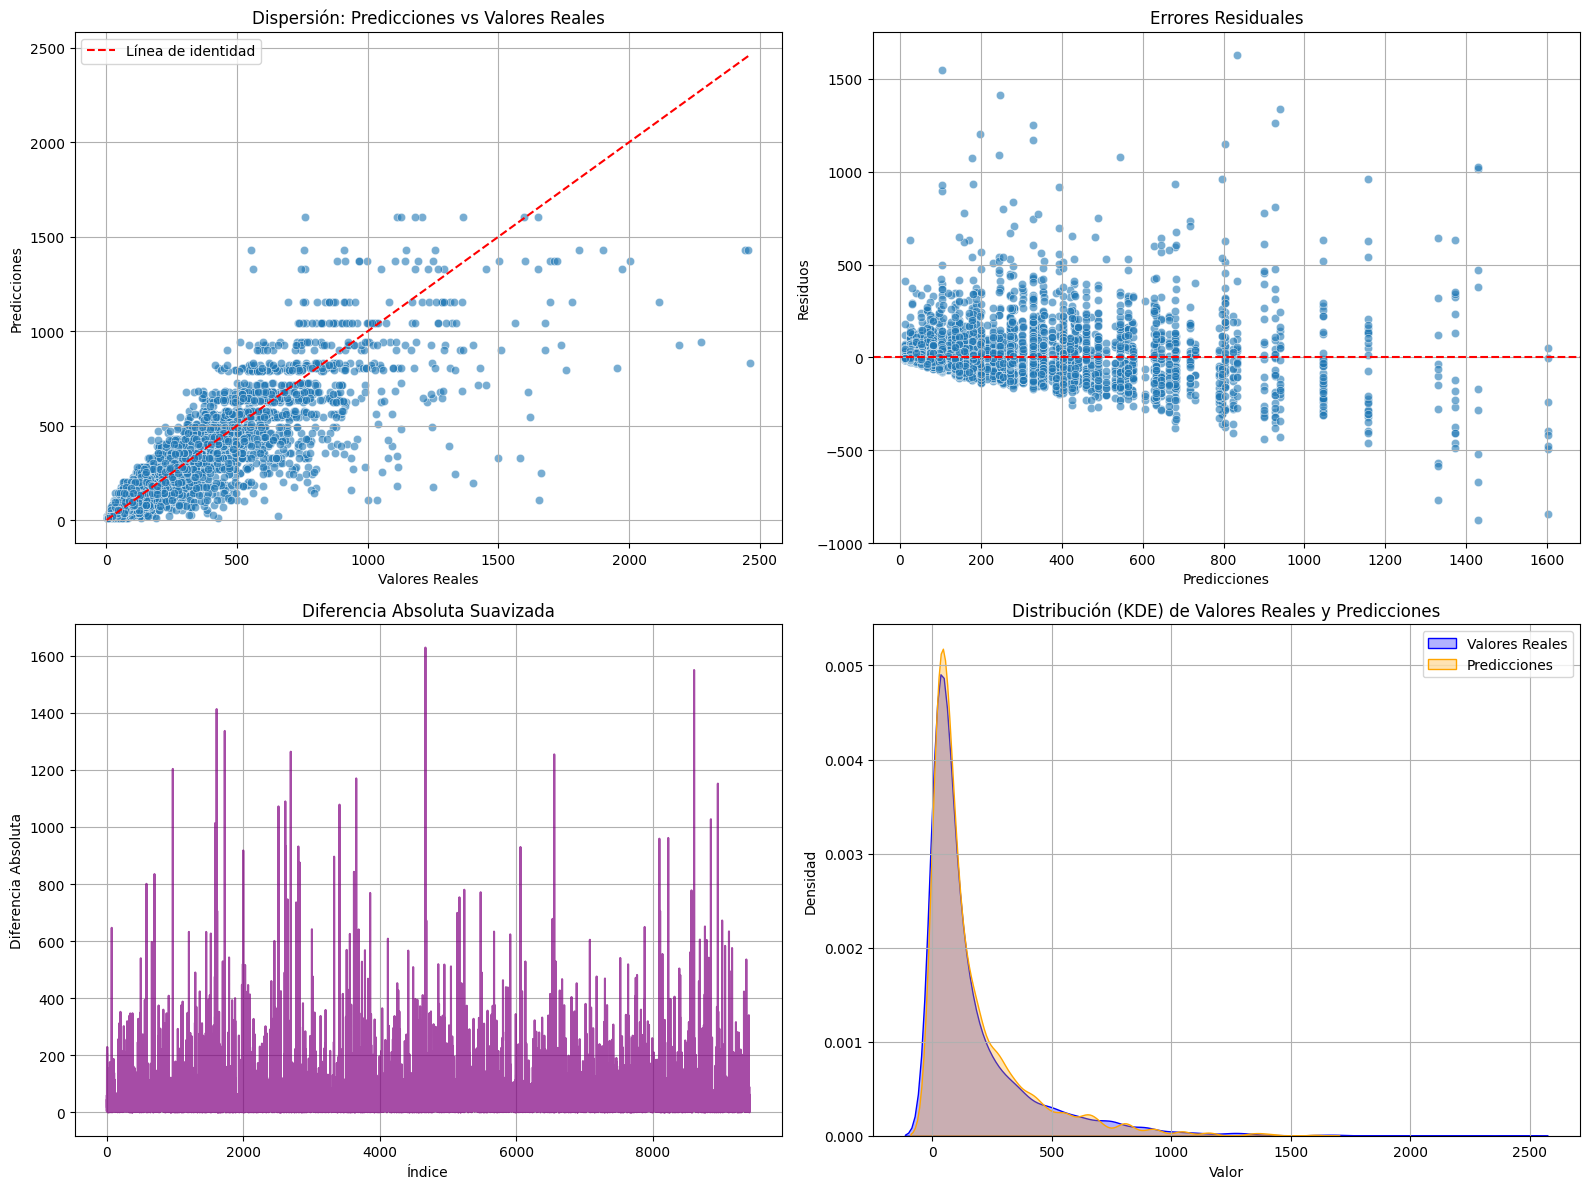

In [87]:
sp.comparativa_graficos(y_test, y_test_pred)

Gráfico 1: Dispersión (Predicciones vs Valores Reales)

- Las predicciones están bien alineadas con los valores reales para rangos bajos y medios, pero en valores altos tienden a subestimar, como se observa en puntos alejados de la línea de identidad. Esto indica que el modelo funciona mejor en casos promedio, pero tiene dificultades en extremos.

Gráfico 2: Errores Residuales

- Los residuales están centrados alrededor de 0, reflejando un buen ajuste general del modelo. Sin embargo, existe mayor dispersión en valores altos, lo que sugiere que los errores aumentan con el tamaño de las predicciones.

Gráfico 3: Diferencia Absoluta Suavizada

- La diferencia absoluta muestra variabilidad razonable en la mayoría de los casos, con algunos picos altos que podrían indicar outliers. Esto sugiere que, aunque el modelo es estable, hay casos extremos que generan errores significativos.

Gráfico 4: Distribución (KDE) de Valores Reales y Predicciones

- Las distribuciones de valores reales y predichos son muy similares, mostrando que el modelo captura bien el comportamiento general de los datos. Las pequeñas desviaciones ocurren principalmente en valores altos, donde el modelo tiende a subestimar.

In [88]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_DecisionTreeRegressor_cluster_0.pkl', 'wb') as file:
    pickle.dump(model_DecisionTreeRegressor, file)